### Full Name : Amirparsa Bahrami
### Student Number : 401101332


# Support Vector Machines (SVM)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [ ]:
df = pd.read_csv("Liver_Disease.csv")

### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

(583, 11)
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64
label
1    416
2    167
Name: count, dtype: int64


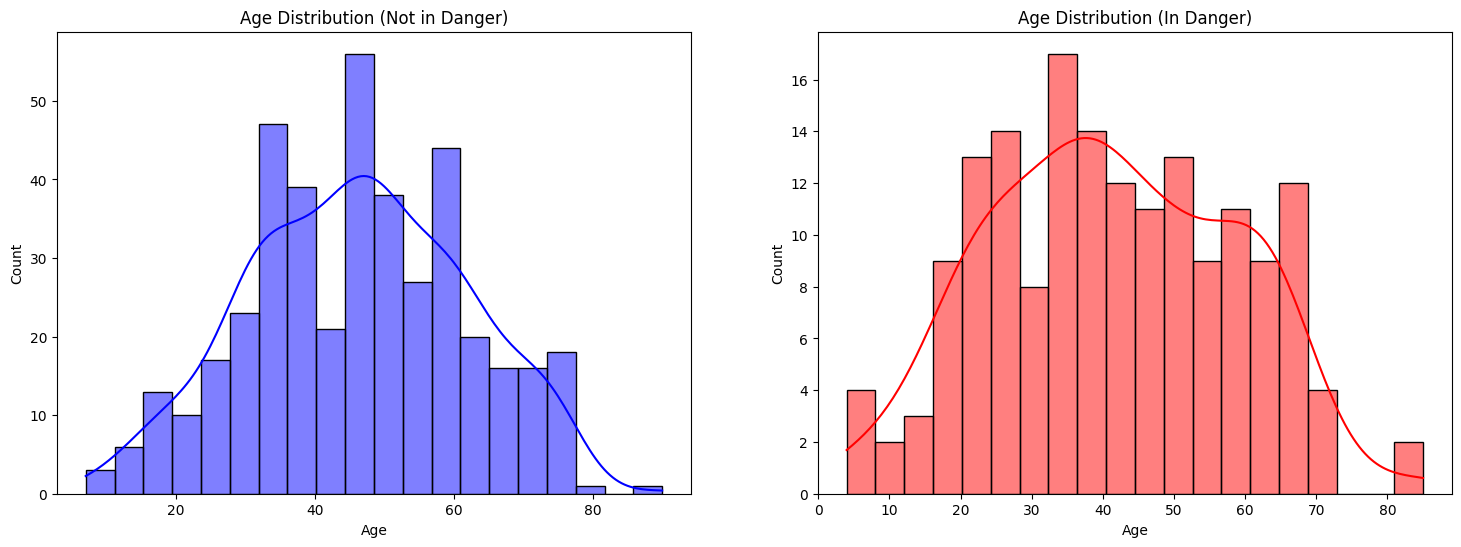

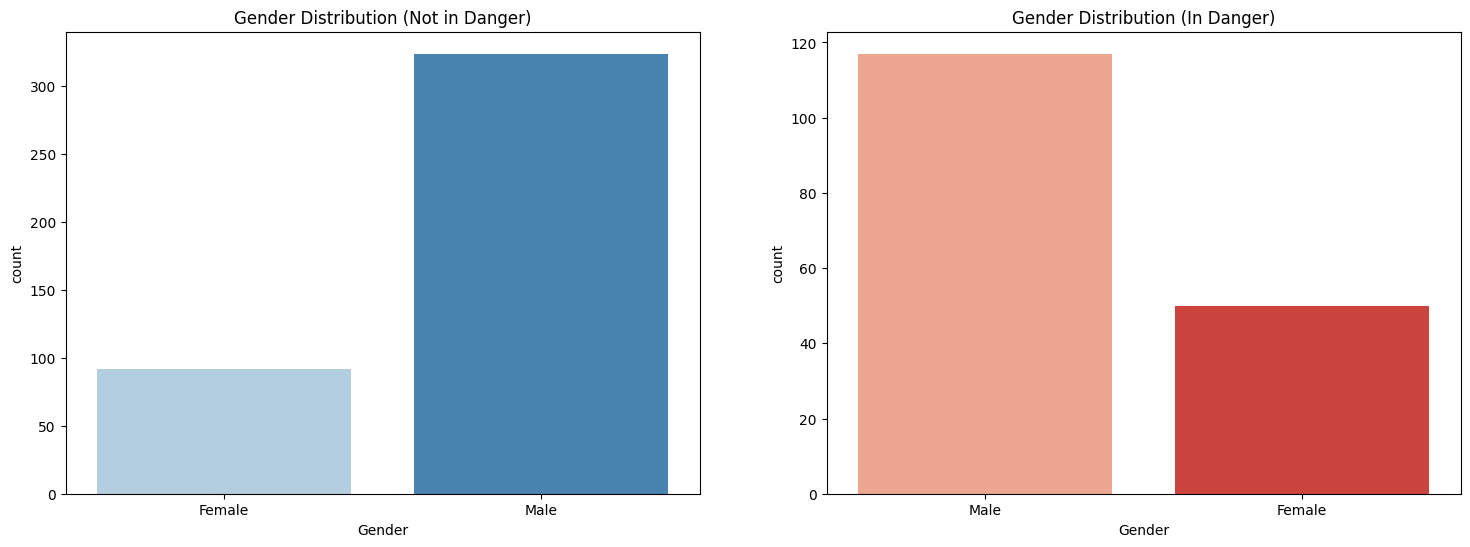

In [ ]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################
print(df.shape)

###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################
print(df.isnull().sum())

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
###############################################################################
print(df['label'].value_counts())

###############################################################################
## TODO: plot the age distirbution and gender distrbution for both group    ##
## of patients.(4 plots)                                                    ##
###############################################################################

# Plot Age Distribution for both groups
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['label'] == 1]['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution (Not in Danger)')

plt.subplot(1, 2, 2)
sns.histplot(df[df['label'] == 2]['Age'], bins=20, kde=True, color='red')
plt.title('Age Distribution (In Danger)')
plt.show()

# Plot Gender Distribution for both groups
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender',hue='Gender', data=df[df['label'] == 1], palette='Blues')
plt.title('Gender Distribution (Not in Danger)')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender',hue='Gender', data=df[df['label'] == 2], palette='Reds')
plt.title('Gender Distribution (In Danger)')
plt.show()


##### Question: What do you conclude from the plots?

	1.	Gender Distribution (Not in Danger vs In Danger):
	•	In the “Not in Danger” group, there are significantly more males than females, with over 300 males compared to around 100 females.
	•	In the “In Danger” group, males are also the majority, but the gender gap is narrower, with around 120 males and fewer than 80 females.
	•	This suggests that, while males dominate both groups, the proportion of females in danger is relatively higher compared to their proportion in the “Not in Danger” group.
	2.	Age Distribution (Not in Danger vs In Danger):
	•	The age distribution for those “Not in Danger” is broader, with a concentration in the middle ages (around 30 to 50 years), peaking around 40. This suggests that middle-aged individuals are more frequently in the “Not in Danger” category.
	•	The “In Danger” group shows a different age distribution, with a higher concentration in younger ages (peaking around 20-25). There is also a spread across older ages, but the younger group seems more likely to be “In Danger.”
	•	The younger age peak in the “In Danger” group may indicate that younger individuals are more vulnerable in this dataset.

The key takeaway is that males dominate both categories, but the younger population seems more at risk based on the age distribution.

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [ ]:
################################################################################
from sklearn.ensemble import IsolationForest
df = df.dropna()
# Detect and remove outliers only for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Initialize Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on dataset size

# Fit the model and predict outliers
iso_forest.fit(numerical_columns)
outliers_prediction = iso_forest.predict(numerical_columns)

# Outliers are marked as -1, inliers as 1
outliers_condition = outliers_prediction == -1

# Separate outliers from the dataset
outliers_df = df[outliers_condition]
df_cleaned = df[~outliers_condition]

print(f"Number of outliers removed: {len(outliers_df)}")
################################################################################


Number of outliers removed: 29


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [ ]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized.                     ##
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])
numerical_columns = outliers_df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
outliers_df[numerical_columns] = scaler.fit_transform(outliers_df[numerical_columns])
################################################################################

<ipython-input-24-43614fb04d96>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])
<ipython-input-24-43614fb04d96>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df[numerical_columns] = scaler.fit_transform(outliers_df[numerical_columns])


### SVM

#### spliting data

In [ ]:
## TODO Split the data into test and training sets.
from sklearn.model_selection import train_test_split

# Encode categorical variables using pd.get_dummies (one-hot encoding)
outliers_df_encoded = pd.get_dummies(outliers_df, drop_first=True)
df_cleaned_encoded = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned_encoded = df_cleaned_encoded.dropna()
# Split the encoded cleaned data into features (X) and target (y)
X_cleaned_encoded = df_cleaned_encoded.drop(columns='label')
y_cleaned = df_cleaned_encoded['label']

# Train/test split
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned_encoded, y_cleaned, test_size=0.2, random_state=42)


### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [ ]:
#########################################################################################
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

# Train an SVM model with default parameters
svm_cleaned = SVC()
svm_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predict and report accuracy on the cleaned data
y_pred_cleaned = svm_cleaned.predict(X_test_cleaned)
print(f"Classification Report:\n {classification_report(y_test_cleaned, y_pred_cleaned)}")
print(f"SVM Accuracy: {accuracy_score(y_test_cleaned, y_pred_cleaned)}")

#########################################################################################


Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        88
         1.0       0.00      0.00      0.00        22

    accuracy                           0.80       110
   macro avg       0.40      0.50      0.44       110
weighted avg       0.64      0.80      0.71       110

SVM Accuracy: 0.8


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [ ]:
#########################################################################################
from sklearn.model_selection import GridSearchCV

# Define the parameters for grid search
param_grid = {'C': [0.05,0.1, 1,5, 10,100], 'gamma': [0.5,1, 0.1, 0.01,0.001], 'kernel': ['rbf', 'linear','poly']}

# Use grid search with cross-validation
grid_cleaned = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Best parameters
print(f"Best Parameters (without outliers): {grid_cleaned.best_params_}")
#########################################################################################


Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END .....C=0.05, gamma=0.5, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END .....C=0.05, gamma=0.5, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END .....C=0.05, gamma=0.5, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END .....C=0.05, gamma=0.5, kernel=rbf;, score=0.682 total time=   0.0s
[CV 5/5] END .....C=0.05, gamma=0.5, kernel=rbf;, score=0.670 total time=   0.0s
[CV 1/5] END ..C=0.05, gamma=0.5, kernel=linear;, score=0.682 total time=   0.0s
[CV 2/5] END ..C=0.05, gamma=0.5, kernel=linear;, score=0.682 total time=   0.0s
[CV 3/5] END ..C=0.05, gamma=0.5, kernel=linear;, score=0.682 total time=   0.0s
[CV 4/5] END ..C=0.05, gamma=0.5, kernel=linear;, score=0.682 total time=   0.0s
[CV 5/5] END ..C=0.05, gamma=0.5, kernel=linear;, score=0.670 total time=   0.0s
[CV 1/5] END ....C=0.05, gamma=0.5, kernel=poly;, score=0.682 total time=   0.0s
[CV 2/5] END ....C=0.05, gamma=0.5, kernel=poly

Train an svm model on the entire training data using the parameters you found in the previous step.

In [ ]:
#########################################################################################
# Train the final model using the best parameters on cleaned data
svm_best_cleaned = SVC(C=grid_cleaned.best_params_['C'], gamma=grid_cleaned.best_params_['gamma'], kernel=grid_cleaned.best_params_['kernel'])
svm_best_cleaned.fit(X_train_cleaned, y_train_cleaned)
#########################################################################################


SVC(C=5, gamma=1, kernel='poly')

### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

Summary of the terms:

	•	True Positive (TP): Correct positive predictions.
	•	False Positive (FP): Incorrect positive predictions (Type I error).
	•	True Negative (TN): Correct negative predictions.
	•	False Negative (FN): Incorrect negative predictions (Type II error).

Key Metrics Derived from the Confusion Matrix:

	•	Accuracy = (TP + TN) / (TP + TN + FP + FN)
	•	Precision = TP / (TP + FP)
	•	Recall (Sensitivity) = TP / (TP + FN)
	•	F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

The confusion matrix gives a comprehensive view of how well the classifier is performing in distinguishing between classes, beyond just overall accuracy.

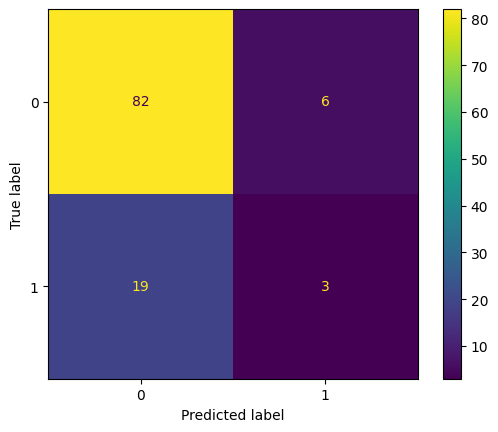

Final Accuracy (without outliers): 0.7727272727272727


In [ ]:
#########################################################################################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict and plot the confusion matrix for the cleaned data
y_pred_best_cleaned = svm_best_cleaned.predict(X_test_cleaned)
cm_cleaned = confusion_matrix(y_test_cleaned, y_pred_best_cleaned)

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_cleaned).plot()
plt.show()

# Report accuracy
print(f"Final Accuracy (without outliers): {accuracy_score(y_test_cleaned, y_pred_best_cleaned)}")
#########################################################################################


Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

SVM Accuracy (with outliers): 0.7068965517241379
Logistic Regression Accuracy (with outliers): 0.6982758620689655


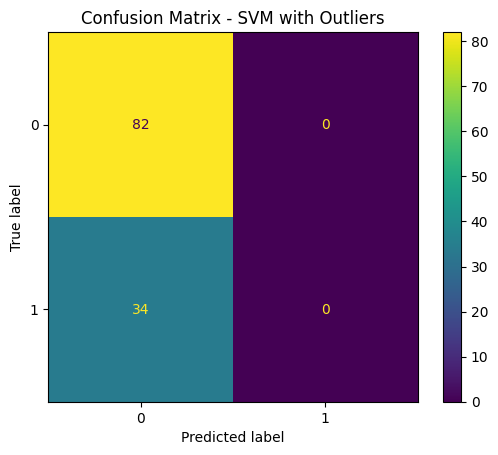

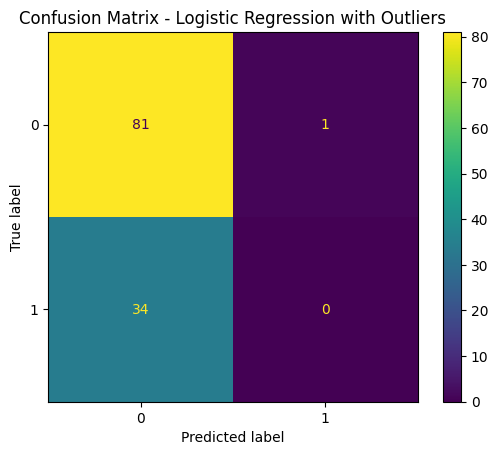

In [ ]:
#########################################################################################
# Add the outliers back to the cleaned dataset
df_with_outliers = pd.concat([df_cleaned_encoded, outliers_df_encoded])

# Re-split the dataset into features and target (X, y)
X_with_outliers = df_with_outliers.drop(columns='label')
y_with_outliers = df_with_outliers['label']

# Split the combined data into train and test sets
X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers = train_test_split(X_with_outliers, y_with_outliers, test_size=0.2, random_state=42)

# Train an SVM model on data with outliers
svm_with_outliers = SVC()
svm_with_outliers.fit(X_train_with_outliers, y_train_with_outliers)

# Predict and report accuracy on the dataset with outliers
y_pred_with_outliers_svm = svm_with_outliers.predict(X_test_with_outliers)
print(f"SVM Accuracy (with outliers): {accuracy_score(y_test_with_outliers, y_pred_with_outliers_svm)}")


from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model on data with outliers
logreg_with_outliers = LogisticRegression(max_iter=1000)  # Set max_iter to ensure convergence
logreg_with_outliers.fit(X_train_with_outliers, y_train_with_outliers)

# Predict and report accuracy on the dataset with outliers
y_pred_with_outliers_logreg = logreg_with_outliers.predict(X_test_with_outliers)
print(f"Logistic Regression Accuracy (with outliers): {accuracy_score(y_test_with_outliers, y_pred_with_outliers_logreg)}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for SVM with outliers
cm_svm_with_outliers = confusion_matrix(y_test_with_outliers, y_pred_with_outliers_svm)
ConfusionMatrixDisplay(confusion_matrix=cm_svm_with_outliers).plot()
plt.title('Confusion Matrix - SVM with Outliers')
plt.show()

# Confusion matrix for Logistic Regression with outliers
cm_logreg_with_outliers = confusion_matrix(y_test_with_outliers, y_pred_with_outliers_logreg)
ConfusionMatrixDisplay(confusion_matrix=cm_logreg_with_outliers).plot()
plt.title('Confusion Matrix - Logistic Regression with Outliers')
plt.show()

#########################################################################################


	•	SVM Accuracy: Likely around 70.7% based on confusion matrix (82 correct out of 116 total).
	•	Logistic Regression Accuracy: Likely slightly lower, due to the single false positive, around 69.8%.

Both models perform poorly in classifying class “1”. This indicates that the data might be imbalanced, or outliers significantly skew the class boundaries. Neither model can handle the class “1” instances in this specific dataset with the outliers present.